### NMF with keras

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Lambda,dot,multiply
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [5]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

In [6]:
from tensorflow.keras.metrics import AUC as auc

In [7]:
from tensorflow.keras.layers import Flatten,Embedding
import random as rn
from IPython.display import SVG

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.constraints import NonNeg
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.activations import sigmoid

## Trying the neural net as MF

In [14]:
splits_for_se_offside = pkl.load(open('splits_for_se_offside.p','rb'))
r_matrix_filtered = splits_for_se_offside['full'][0]
full_df = splits_for_se_offside['full'][1]
full_df_cat = splits_for_se_offside['full'][2]
R_train = splits_for_se_offside['train'][0]
train_df = splits_for_se_offside['train'][1]
R_test = splits_for_se_offside['test'][0]
test_df = splits_for_se_offside['test'][1]

In [15]:
onehot_df_drugs = pkl.load(open('onehot_df_drugs_offsides.p','rb'))

In [16]:
from tensorflow.keras.constraints import NonNeg
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.activations import sigmoid

In [17]:
from tensorflow.keras.layers import concatenate, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, dot

In [18]:
r_matrix_filtered

umls_id-se,stitch_id,C0000731-abdominal distension,C0000737-abdominal pain,C0000768-birth defect,C0000786-abortion,C0000814-abortion missed,C0000832-premature separation of placenta,C0000833-abscess,C0000889-acanthosis,C0001122-acidosis,...,C1510431-superficial thrombophlebitis,C1510471-hypovitaminosis,C1510472-drug addict,C1510475-diverticulosis,C1527336-sjogren's syndrome,C1527344-dysphonia,C1527383-morphea,C1527407-eosinophilic pneumonia,C1527411-retinal vein thrombosis,C1621958-glioblastoma multiforme
0,1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,104741,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,104865,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,10631,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1065,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,937,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,93860,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
632,942,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
633,9433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
onehot_df_drugs.set_index('stitch_id',inplace=True)
onehot_df_drugs

,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,drug_8,drug_9,...,drug_625,drug_626,drug_627,drug_628,drug_629,drug_630,drug_631,drug_632,drug_633,drug_634
stitch_id,,,,,,,,,,,,,,,,,,,,,
1046,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104865,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10631,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1065,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1]:
def linear_activation(x):
    return x

In [21]:
def create_model(input_shape, output_shape, k = 10, l2_reg = 0):
    my_input = Input(input_shape)
    drug_embedding = Dense(k, activation=linear_activation, kernel_initializer = RandomUniform(minval=0.0, maxval=0.1),
                           kernel_regularizer = regularizers.l2(l2_reg),
                           name='w_layer', use_bias = False, kernel_constraint=NonNeg())(my_input)
    final_layer = Dense(output_shape, activation=linear_activation, kernel_initializer = RandomUniform(minval=0.0, maxval=0.1),
                           kernel_regularizer = regularizers.l2(l2_reg),
                           name='main_output', use_bias = False, kernel_constraint=NonNeg())(drug_embedding)

    return Model(my_input, final_layer)

In [37]:
input_shape = (635,)
output = 1213
k = 10
epochs = 800
full_model = create_model(input_shape, output, k)
full_model.compile(optimizer='adam', loss='mse')
history = full_model.fit(onehot_df_drugs.values,R_train,
                epochs=epochs, verbose=0, shuffle=True)
W = full_model.get_layer('w_layer').get_weights()[0]
H = full_model.get_layer('main_output').get_weights()[0]
predicted = np.dot(W,H)
poslabels = R_test > 0
neglabels = r_matrix_filtered.set_index('stitch_id').values == 0
no_neglabels = sum(sum(neglabels[:]))
no_poslabels = sum(sum(poslabels[:]))
labels = np.zeros(no_poslabels+no_neglabels)
labels[0:no_poslabels] = 1.0
predicted_scores = np.zeros(no_poslabels + no_neglabels)
predicted_scores[0:no_poslabels] = predicted[poslabels]
predicted_scores[no_poslabels:] = predicted[neglabels]
print(roc_auc_score(labels,predicted_scores))
print(average_precision_score(labels,predicted_scores))

0.8272976882564305
0.17366735976119593


[Text(0, 0.5, 'J'),
 Text(0.5, 0, 'epochs'),
 Text(0.5, 1.0, 'Cost function - NMF - NN')]

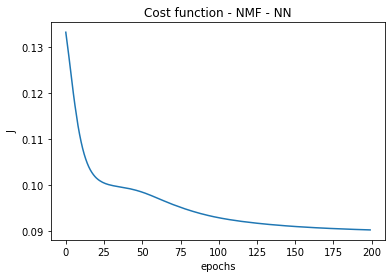

In [23]:
J = history.history['loss']
ax = sns.lineplot(x = range(len(J)),y=J)
ax.set(title='Cost function - NMF - NN', ylabel='J',xlabel='epochs')
# plt.savefig('left_side_model_loss_100_epochs.png',dpi=300)

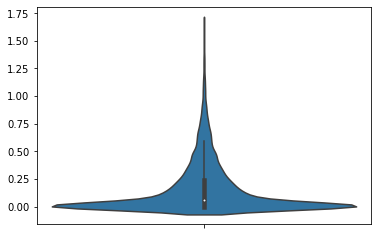

In [24]:
sns.violinplot(y=H)

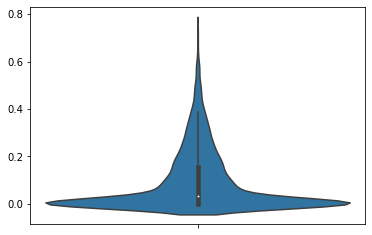

In [25]:
sns.violinplot(y=W)

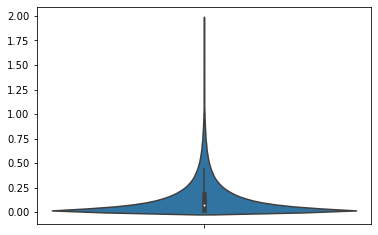

In [39]:
sns.violinplot(y=predicted)

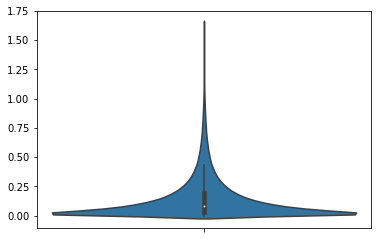

In [40]:
sns.violinplot(y=Res)

In [26]:
Res = pkl.load(open('nmf_offsides_Res.p','rb'))

In [27]:
from scipy.stats import pearsonr

In [38]:
pearsonr(predicted.flatten(),Res.flatten())

(0.9724153568652734, 0.0)